In [1]:
#라이브러리 import
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 주가 데이터 받아오기
df = yf.download('QQQ', start='2020-01-01', end='2024-12-31')
df = df[['Close']]
df['SMA20'] = df['Close'].rolling(window=20).mean()
df['SMA60'] = df['Close'].rolling(window=60).mean()
df.dropna(inplace=True)
df.tail()

C:\Users\User\AppData\Local\Temp\ipykernel_89392\2597750633.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download('QQQ', start='2020-01-01', end='2024-12-31')
[*********************100%***********************]  1 of 1 completed


Price,Close,SMA20,SMA60
Ticker,QQQ,,
Date,,,
2024-12-23,522.091431,518.966138,502.622144
2024-12-24,529.170898,520.173618,503.332348
2024-12-26,528.811401,521.227544,504.149543
2024-12-27,521.781860,522.129872,504.838280
2024-12-30,514.842224,522.463907,505.417339


In [3]:
# 매수 매도 포지션 계산
df['Signal'] = 0
df.loc[df['SMA20'] > df['SMA60'], 'Signal'] = 1
df['Position'] = df['Signal'].shift(1)
df.dropna(inplace=True)

C:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\I

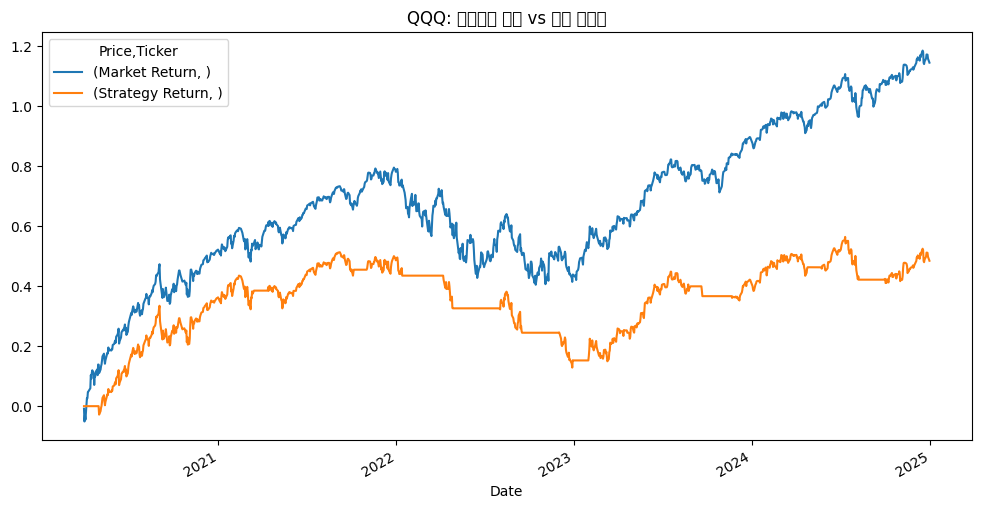

In [4]:
# 전략 수익률 계산 & 시각화
df['Market Return'] = df['Close'].pct_change()
df['Strategy Return'] = df['Market Return'] * df['Position']

df[['Market Return', 'Strategy Return']].cumsum().plot(figsize=(12, 6))
plt.title("QQQ: 이동평균 전략 vs 시장 수익률")
plt.show()

In [5]:
# 전략 성과 지표 계산
cagr = (df['Strategy Return'] + 1).prod()**(1/4.0) - 1
mdd = (df['Strategy Return'].cumsum().cummax() - df['Strategy Return'].cumsum()).max()
sharpe = df['Strategy Return'].mean() / df['Strategy Return'].std() * (252**0.5)

print(f"CAGR: {cagr:.2%}")
print(f"Max Drawdown: {mdd:.2%}")
print(f"Sharpe Ratio: {sharpe:.2f}")

CAGR: 10.96%
Max Drawdown: 38.40%
Sharpe Ratio: 0.60


## 전략 개요

 - 20일 이동평균이 60일 이동평균을 상향 돌파할 때 매수
 - 반대로 하향 돌파할 때 포지션 종료

<Figure size 1200x600 with 0 Axes>

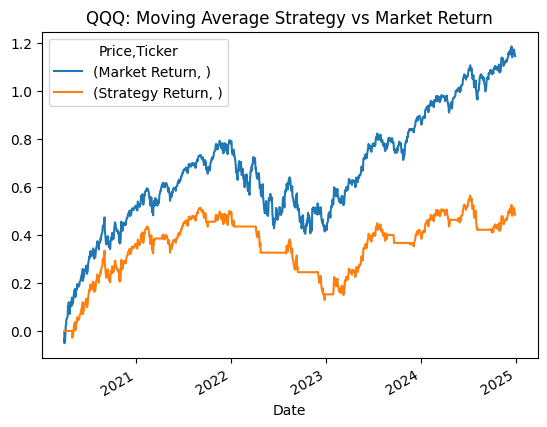

In [7]:
plt.figure(figsize=(12, 6))
df[['Market Return', 'Strategy Return']].cumsum().plot()
plt.title("QQQ: Moving Average Strategy vs Market Return")
plt.savefig("results.png")  # ← 이 줄이 저장 기능!
plt.show()